## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [4]:
## 畫圖所需要的import 
## 文件參考 https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## 載入房價預測

In [5]:
bonton = datasets.load_boston() # regression 

X_train, X_test, y_train, y_test = train_test_split(bonton.data, bonton.target, test_size = 0.2, random_state = 4)

dTreeRegression = DecisionTreeRegressor()

dTreeRegression.fit(X_train, y_train)

y_pred = dTreeRegression.predict(X_test)

In [6]:
mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  26.12578431372549


In [7]:
print("Feature importance: ", dTreeRegression.feature_importances_)

Feature importance:  [3.68730138e-02 1.19303293e-03 3.84515866e-03 2.51524120e-06
 4.97043407e-02 5.80998760e-01 1.04679236e-02 6.05058044e-02
 5.01828347e-04 1.44759107e-02 2.19022104e-02 9.69755775e-03
 2.09831944e-01]


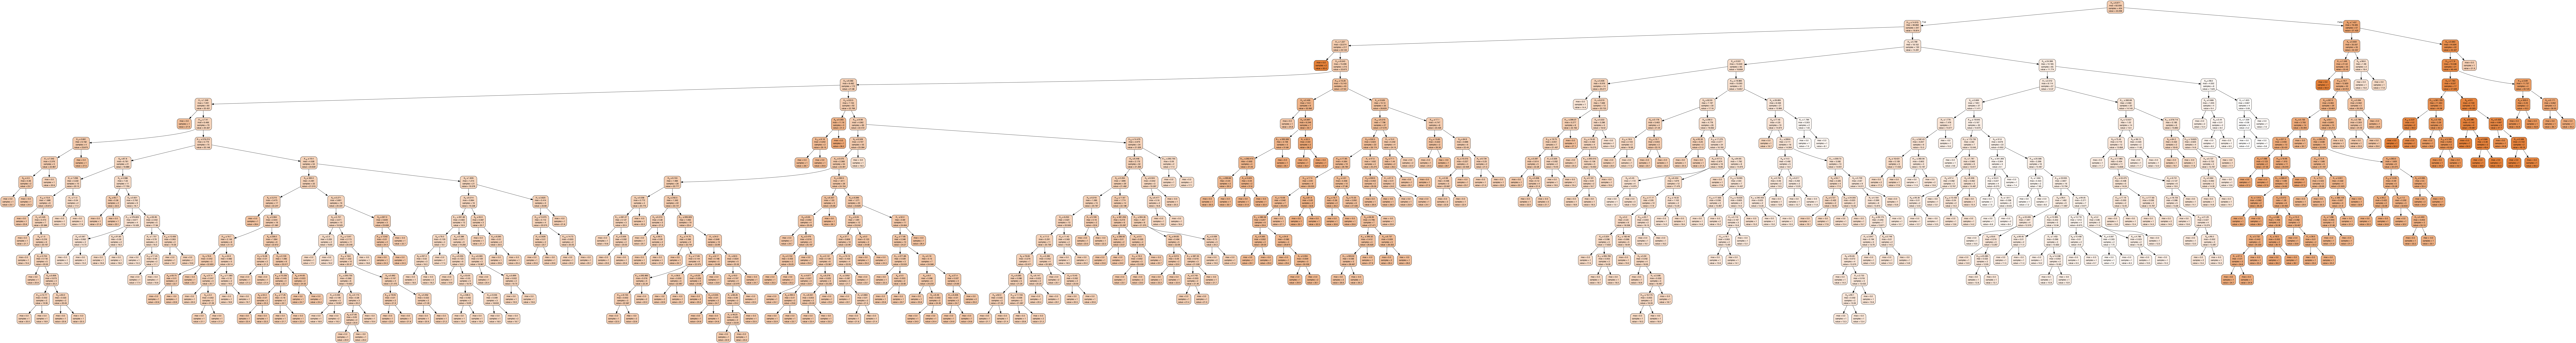

In [8]:
dot_data = StringIO()
export_graphviz(dTreeRegression, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 載入葡萄酒預測類別

In [9]:
wine = datasets.load_wine() # regression 

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.2, random_state = 4)

dTreeClassification = DecisionTreeClassifier()

dTreeClassification.fit(X_train, y_train)

y_pred = dTreeClassification.predict(X_test)

In [10]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8888888888888888


## 畫出分類數的圖形

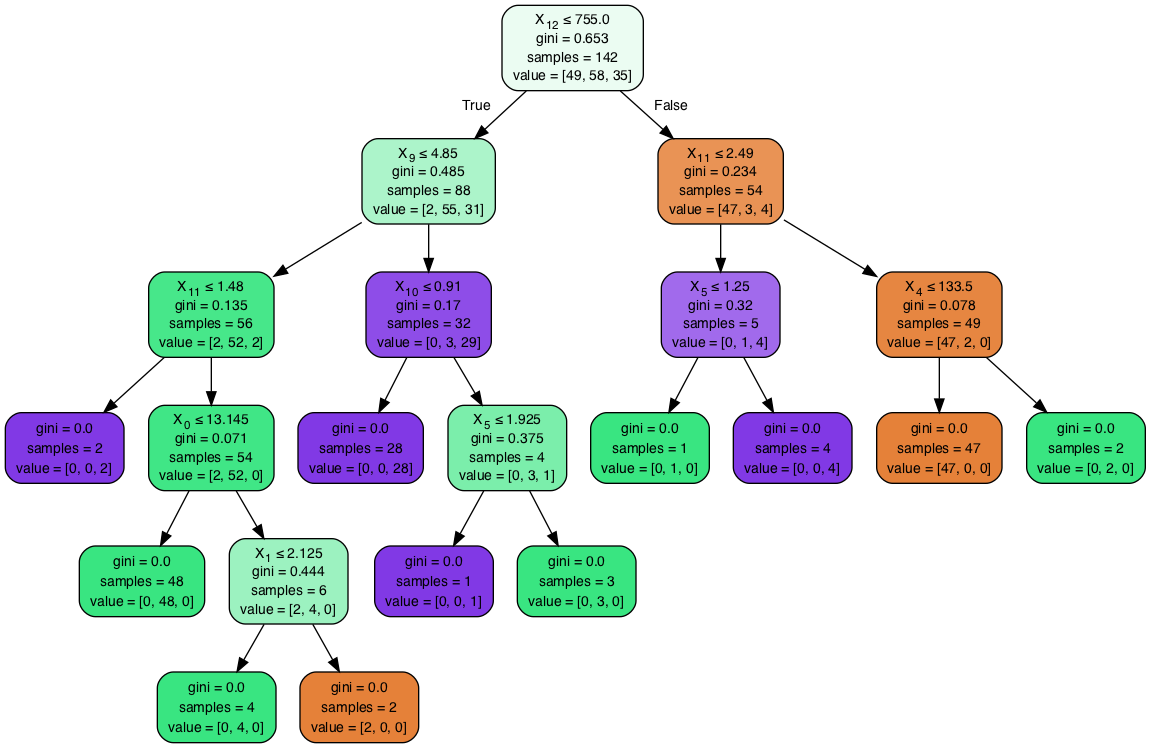

In [11]:
dot_data = StringIO()
export_graphviz(dTreeClassification, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())